<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/11_LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 51kB/s 
     |████████████████████████████████| 3.1MB 44.5MB/s 
     |████████████████████████████████| 501kB 64.0MB/s 


In [0]:
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

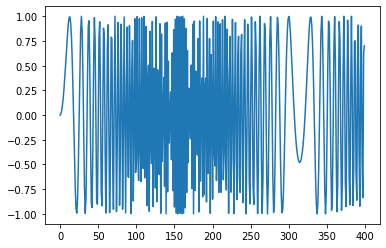

In [0]:
data = np.sin((0.1*np.arange(400))**2)
plt.plot(data)

In [0]:
T = 10
X = []
y = []
for i in range(len(data) - T):
  X.append(data[i: i+T])
  y.append(data[i+T])

X = np.array(X).reshape(-1, T) # now the dimension should be (N x T)
y = np.array(y)
N = len(X)
X.shape

(390, 10)

### Linear model

In [0]:
i = Input(shape = (T,))
x = Dense(1)(i)

model = Model(i, x)
model.compile(loss = "mse", optimizer = Adam(learning_rate = 0.01))

r = model.fit(X[:N//2, :], y[:N//2], validation_data = (X[N//2:, :], y[N//2:]), epochs = 80)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 487us/sample - loss: 1.2253 - val_loss: 1.1631
Epoch 2/80
195/195 [==============================] - 0s 66us/sample - loss: 1.0302 - val_loss: 1.0996
Epoch 3/80
195/195 [==============================] - 0s 61us/sample - loss: 0.8869 - val_loss: 1.0300
Epoch 4/80
195/195 [==============================] - 0s 63us/sample - loss: 0.7792 - val_loss: 0.9684
Epoch 5/80
195/195 [==============================] - 0s 62us/sample - loss: 0.7011 - val_loss: 0.9098
Epoch 6/80
195/195 [==============================] - 0s 61us/sample - loss: 0.6439 - val_loss: 0.8502
Epoch 7/80
195/195 [==============================] - 0s 60us/sample - loss: 0.6013 - val_loss: 0.7886
Epoch 8/80
195/195 [==============================] - 0s 67us/sample - loss: 0.5695 - val_loss: 0.7399
Epoch 9/80
195/195 [==============================] - 0s 58us/sample - loss: 0.5479 - val_loss: 0.7058
Epoch 10/80
195/195 [=====

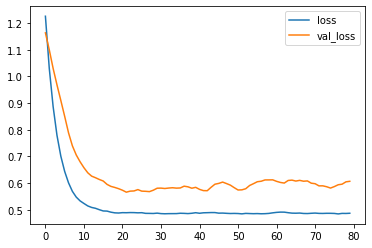

In [0]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

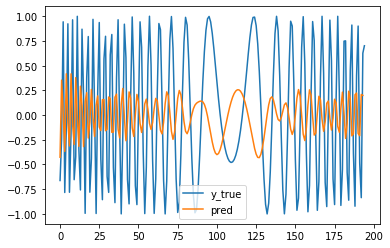

In [0]:
# One step forecast
# This is not correct way toe forcast values since here we are taking true values
# and predicting not the predicted values
X_test = X[N//2:, :]
y_test = y[N//2:]
prediction_data = []

for i in range(len(X_test)-1):
  prediction_data.append(model.predict(X_test[i].reshape(-1, T))[0, 0])

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

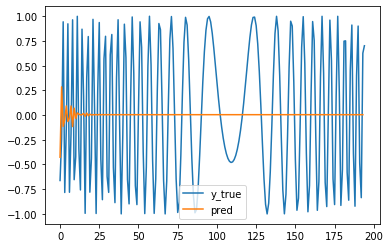

In [0]:
# multi-step forecast
# This is correct way to forcast values since here we are taking predicted values
# to forcast next sequence
y_test = y[N//2:]
prediction_data = []
X_last = X[N//2]

for i in range(len(X_test)-1):
  pred = model.predict(X_last.reshape(-1, T))[0, 0]
  prediction_data.append(pred)

  X_last = np.roll(X_last, -1)
  X_last[-1] = pred

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

### RNN model

In [0]:
X = X.reshape(-1, T, 1) # N x T x D

i = Input(shape = (T,1))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i, x)
model.compile(loss = "mse", optimizer = Adam(learning_rate = 0.01))

r = model.fit(X[:N//2, :], y[:N//2], validation_data = (X[N//2:, :], y[N//2:]), epochs = 80)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 2ms/sample - loss: 0.6733 - val_loss: 0.7189
Epoch 2/80
195/195 [==============================] - 0s 163us/sample - loss: 0.5054 - val_loss: 0.6009
Epoch 3/80
195/195 [==============================] - 0s 149us/sample - loss: 0.4908 - val_loss: 0.5699
Epoch 4/80
195/195 [==============================] - 0s 141us/sample - loss: 0.4677 - val_loss: 0.5832
Epoch 5/80
195/195 [==============================] - 0s 137us/sample - loss: 0.4480 - val_loss: 0.5990
Epoch 6/80
195/195 [==============================] - 0s 157us/sample - loss: 0.4315 - val_loss: 0.5720
Epoch 7/80
195/195 [==============================] - 0s 136us/sample - loss: 0.4148 - val_loss: 0.5489
Epoch 8/80
195/195 [==============================] - 0s 134us/sample - loss: 0.3935 - val_loss: 0.5511
Epoch 9/80
195/195 [==============================] - 0s 136us/sample - loss: 0.3833 - val_loss: 0.5012
Epoch 10/80
195/195 

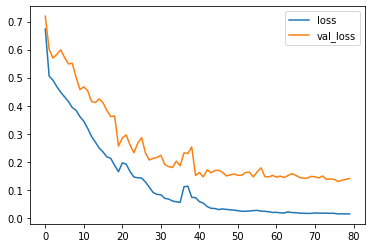

In [0]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

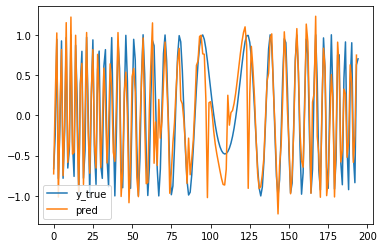

In [0]:
# One step forecast
# This is not correct way toe forcast values since here we are taking true values
# and predicting not the predicted values
X_test = X[N//2:, :]
y_test = y[N//2:]
prediction_data = []

for i in range(len(X_test)-1):
  prediction_data.append(model.predict(X_test[i].reshape(-1, T, 1))[0, 0])

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

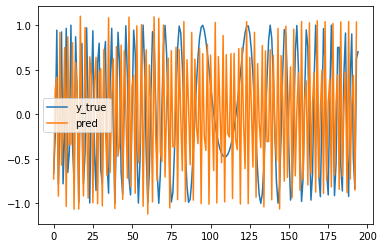

In [0]:
# multi-step forecast
# This is correct way to forcast values since here we are taking predicted values
# to forcast next sequence
y_test = y[N//2:]
prediction_data = []
X_last = X[N//2]

for i in range(len(X_test)-1):
  pred = model.predict(X_last.reshape(-1, T, 1))[0, 0]
  prediction_data.append(pred)

  X_last = np.roll(X_last, -1)
  X_last[-1] = pred

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

### LSTM Model

In [0]:
i = Input(shape = (T, 1))
x = LSTM(10)(i)
x = Dense(1)(x)

model = Model(i, x)
model.compile(loss = "mse", optimizer = Adam(learning_rate = 0.01))

r = model.fit(X[:N//2, :], y[:N//2], batch_size = 32, validation_data = (X[N//2:, :], y[N//2:]), epochs = 80)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 1s 4ms/sample - loss: 0.5432 - val_loss: 0.4643
Epoch 2/80
195/195 [==============================] - 0s 199us/sample - loss: 0.5218 - val_loss: 0.4750
Epoch 3/80
195/195 [==============================] - 0s 203us/sample - loss: 0.5057 - val_loss: 0.4927
Epoch 4/80
195/195 [==============================] - 0s 193us/sample - loss: 0.4971 - val_loss: 0.5190
Epoch 5/80
195/195 [==============================] - 0s 197us/sample - loss: 0.4861 - val_loss: 0.5216
Epoch 6/80
195/195 [==============================] - 0s 204us/sample - loss: 0.4642 - val_loss: 0.5531
Epoch 7/80
195/195 [==============================] - 0s 234us/sample - loss: 0.4481 - val_loss: 0.5404
Epoch 8/80
195/195 [==============================] - 0s 209us/sample - loss: 0.3994 - val_loss: 0.5700
Epoch 9/80
195/195 [==============================] - 0s 207us/sample - loss: 0.3574 - val_loss: 0.5753
Epoch 10/80
195/195 

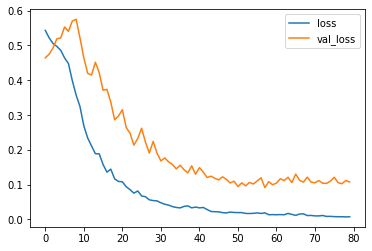

In [0]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

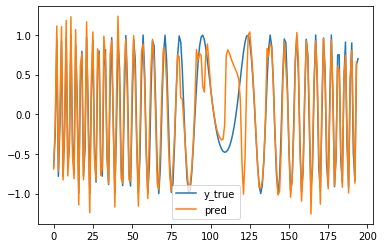

In [0]:
# One step forecast
# This is not correct way toe forcast values since here we are taking true values
# and predicting not the predicted values
X_test = X[N//2:, :]
y_test = y[N//2:]
prediction_data = []

for i in range(len(X_test)-1):
  prediction_data.append(model.predict(X_test[i].reshape(-1, T, 1))[0, 0])

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

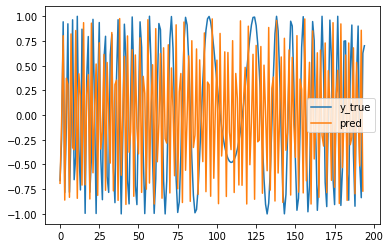

In [0]:
# multi-step forecast
# This is correct way to forcast values since here we are taking predicted values
# to forcast next sequence
y_test = y[N//2:]
prediction_data = []
X_last = X[N//2]

for i in range(len(X_test)-1):
  pred = model.predict(X_last.reshape(-1, T, 1))[0, 0]
  prediction_data.append(pred)

  X_last = np.roll(X_last, -1)
  X_last[-1] = pred

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

### GRU Model

In [0]:
i = Input(shape = (T, 1))
x = GRU(10)(i)
x = Dense(1)(x)

model = Model(i, x)
model.compile(loss = "mse", optimizer = Adam(learning_rate = 0.01))

r = model.fit(X[:N//2, :], y[:N//2], batch_size = 32, validation_data = (X[N//2:, :], y[N//2:]), epochs = 80)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 1s 5ms/sample - loss: 0.5429 - val_loss: 0.4832
Epoch 2/80
195/195 [==============================] - 0s 275us/sample - loss: 0.5216 - val_loss: 0.5112
Epoch 3/80
195/195 [==============================] - 0s 235us/sample - loss: 0.5105 - val_loss: 0.5288
Epoch 4/80
195/195 [==============================] - 0s 265us/sample - loss: 0.5064 - val_loss: 0.5440
Epoch 5/80
195/195 [==============================] - 0s 243us/sample - loss: 0.5043 - val_loss: 0.5778
Epoch 6/80
195/195 [==============================] - 0s 247us/sample - loss: 0.4972 - val_loss: 0.5974
Epoch 7/80
195/195 [==============================] - 0s 235us/sample - loss: 0.4948 - val_loss: 0.6088
Epoch 8/80
195/195 [==============================] - 0s 235us/sample - loss: 0.4963 - val_loss: 0.6118
Epoch 9/80
195/195 [==============================] - 0s 251us/sample - loss: 0.4962 - val_loss: 0.6043
Epoch 10/80
195/195 

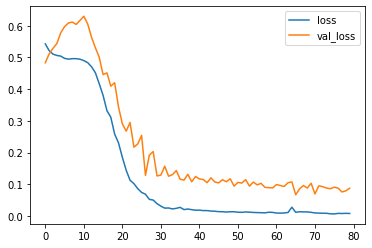

In [0]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

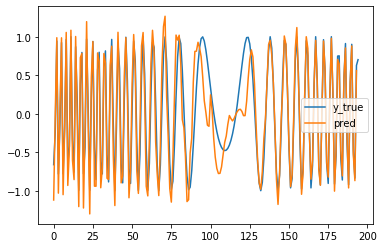

In [0]:
# One step forecast
# This is not correct way toe forcast values since here we are taking true values
# and predicting not the predicted values
X_test = X[N//2:, :]
y_test = y[N//2:]
prediction_data = []

for i in range(len(X_test)-1):
  prediction_data.append(model.predict(X_test[i].reshape(-1, T, 1))[0, 0])

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

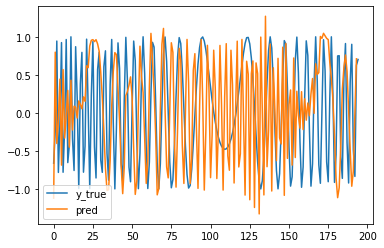

In [0]:
# multi-step forecast
# This is correct way to forcast values since here we are taking predicted values
# to forcast next sequence
y_test = y[N//2:]
prediction_data = []
X_last = X[N//2]

for i in range(len(X_test)-1):
  pred = model.predict(X_last.reshape(-1, T, 1))[0, 0]
  prediction_data.append(pred)

  X_last = np.roll(X_last, -1)
  X_last[-1] = pred

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()